<a href="https://colab.research.google.com/github/kaisarfardin6620/Online-Sales-Analysis./blob/main/Online_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/online_sales_dataset.csv')

In [78]:
df.shape

(49782, 17)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [80]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [81]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [82]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


In [83]:
df.duplicated().sum()

0

In [84]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [85]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [86]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['StockCode', 'Description', 'InvoiceDate', 'Country', 'PaymentMethod',
       'Category', 'SalesChannel', 'ReturnStatus', 'ShipmentProvider',
       'WarehouseLocation', 'OrderPriority'],
      dtype='object')


In [87]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'Discount',
       'ShippingCost'],
      dtype='object')


In [88]:
df['Country'].value_counts()

,count
Country,
France,4230
Sweden,4211
Germany,4182
United Kingdom,4180
Netherlands,4173
Belgium,4170
Portugal,4163
Norway,4157
Australia,4110


In [89]:
df['Category'].value_counts()

,count
Category,
Furniture,10084
Accessories,9975
Electronics,9931
Stationery,9928
Apparel,9864


In [90]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Bank Transfer,16747
Credit Card,16530
paypall,16505


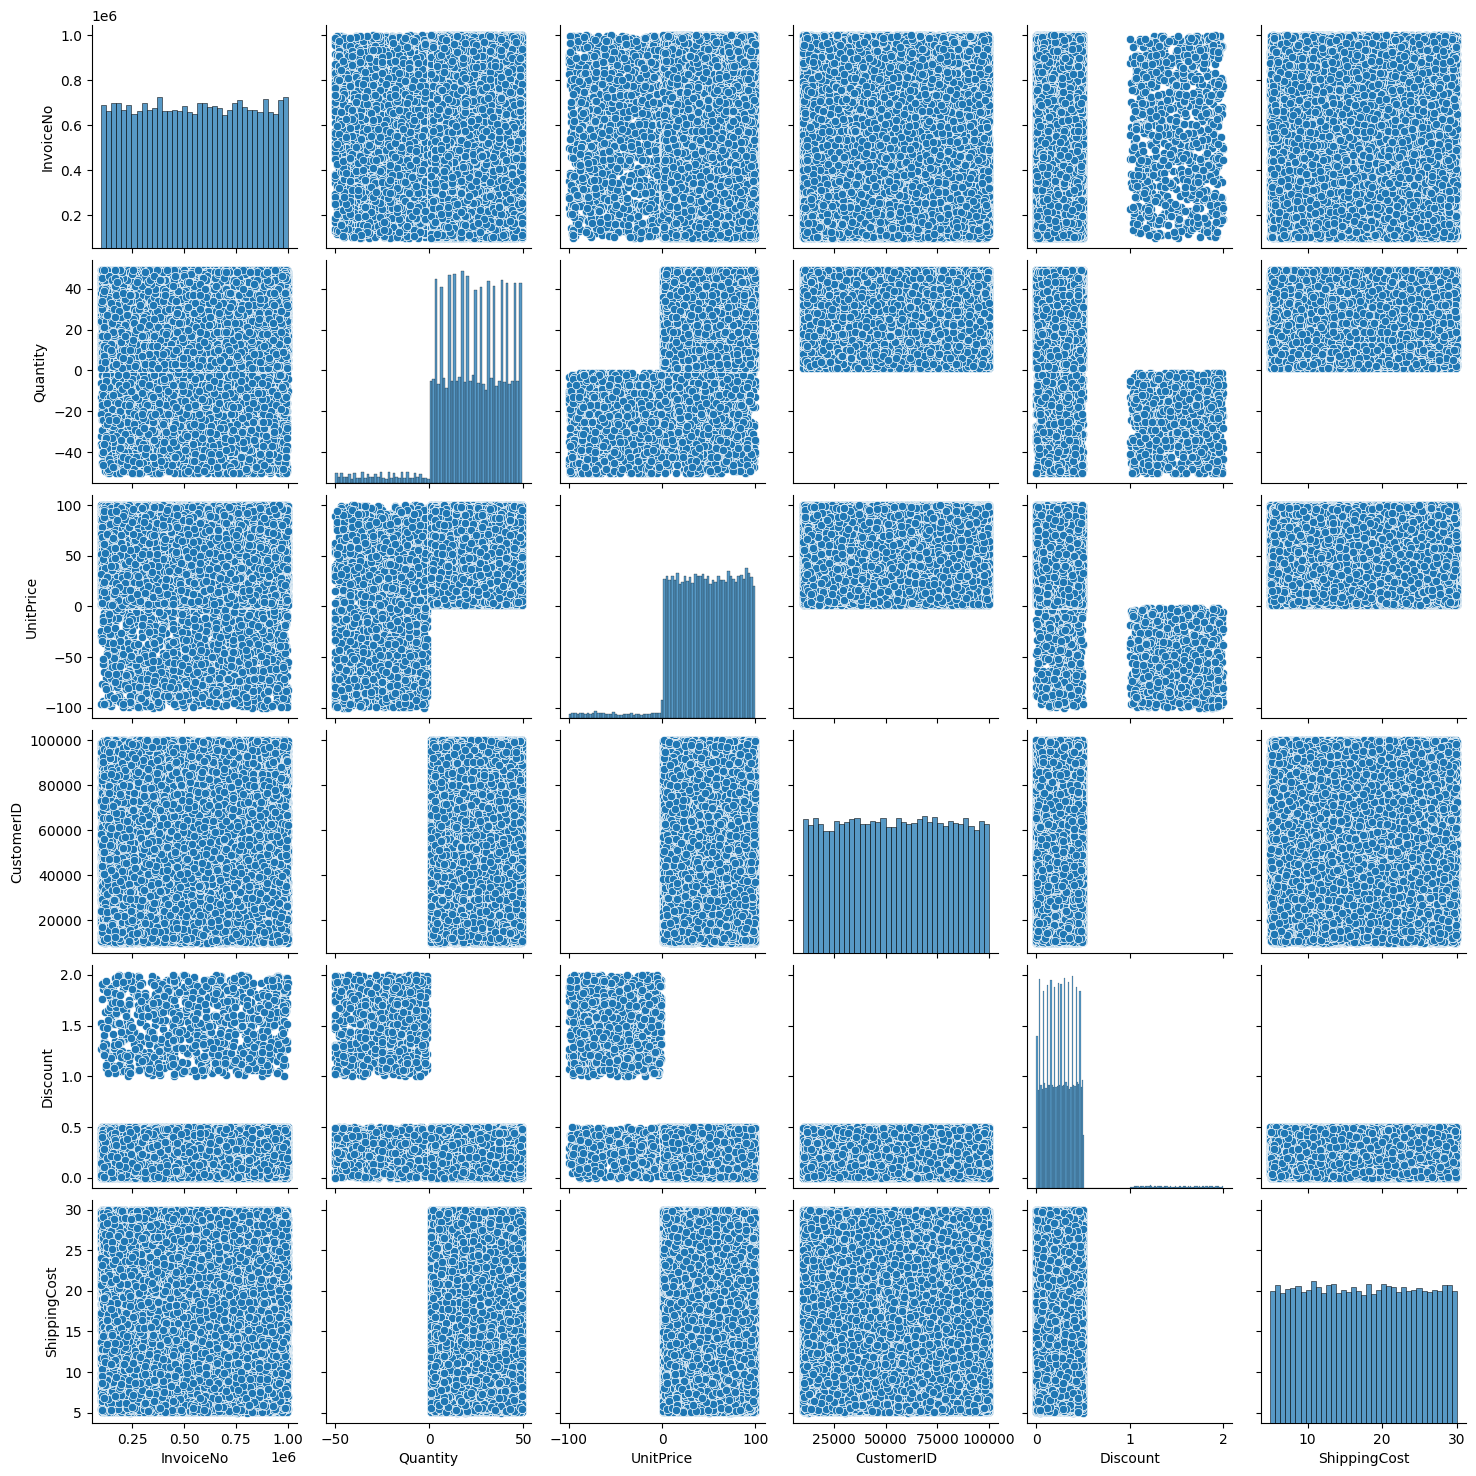

In [91]:
sns.pairplot(data=df)

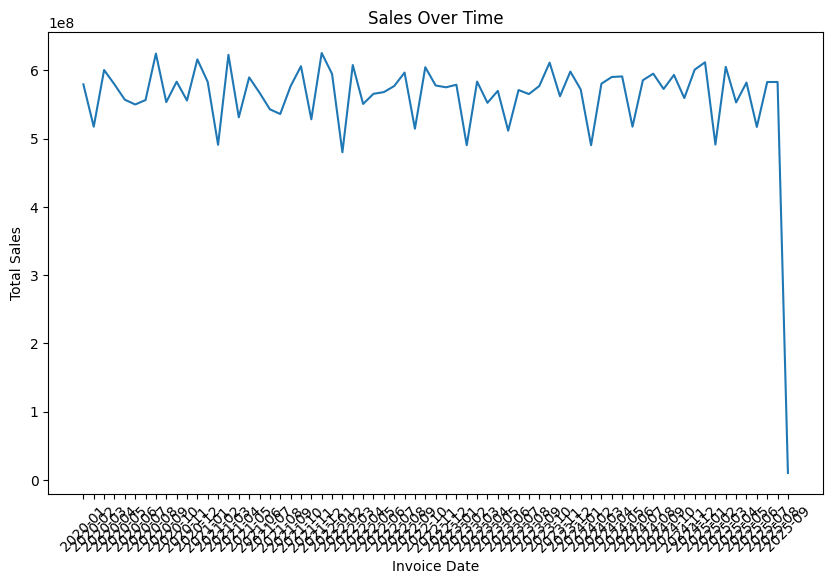

In [92]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

sales_over_time = df.groupby(df['InvoiceDate'].dt.to_period('M'))[['UnitPrice', 'Quantity']].sum().reset_index()

sales_over_time['TotalSales'] = sales_over_time['UnitPrice'] * sales_over_time['Quantity']

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['InvoiceDate'].astype(str), sales_over_time['TotalSales']) # Use the new 'TotalSales' column
plt.title('Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [93]:
sales_by_country = df.groupby('Country').sum(numeric_only=True).reset_index()


fig = px.choropleth(sales_by_country, locations='Country', locationmode='country names',
                    color=sales_by_country['UnitPrice'] * sales_by_country['Quantity'],
                    title='Sales by Country')
fig.show()

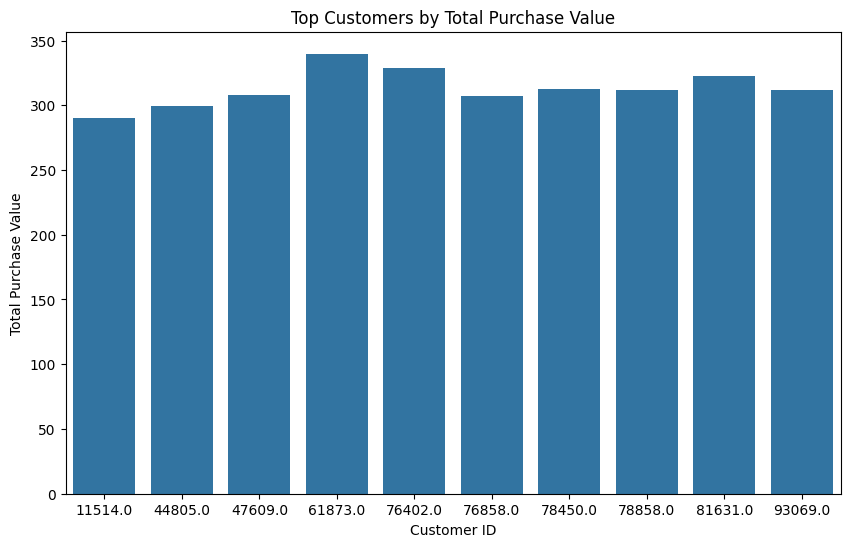

In [94]:
top_customers = df.groupby('CustomerID').agg({'UnitPrice': 'sum'}).reset_index().nlargest(10, 'UnitPrice')

plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='UnitPrice', data=top_customers)
plt.title('Top Customers by Total Purchase Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Value')
plt.show()

In [95]:
customer_segmentation = df.groupby('Country').nunique()['CustomerID'].reset_index()

fig = px.pie(customer_segmentation, names='Country', values='CustomerID', title='Customer Segmentation by Country')
fig.show()


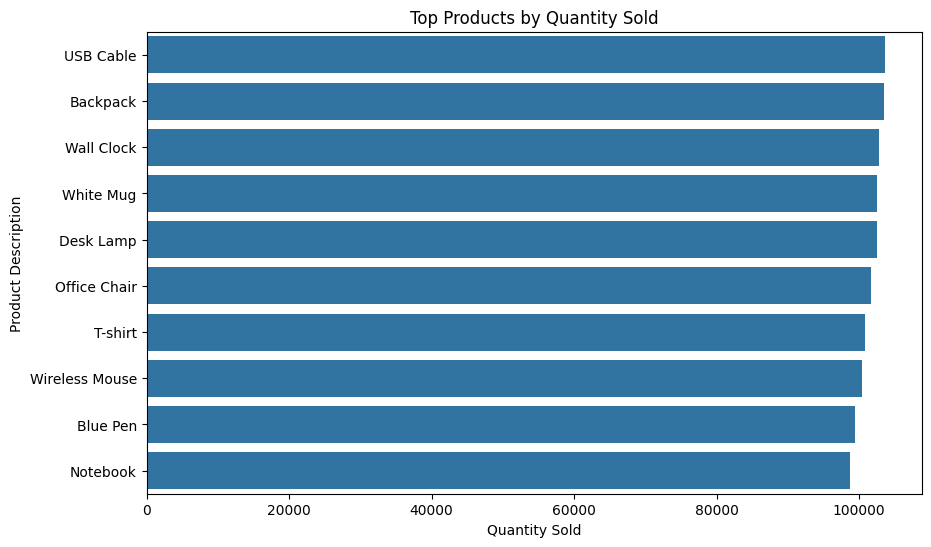

In [96]:
top_products = df.groupby('Description').sum(numeric_only=True).reset_index().nlargest(10, 'Quantity')

plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_products)
plt.title('Top Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [97]:
category_sales = df.groupby('Category').sum(numeric_only=True).reset_index()

fig = px.treemap(category_sales, path=['Category'], values='UnitPrice',
                 title='Sales Distribution by Category')
fig.show()


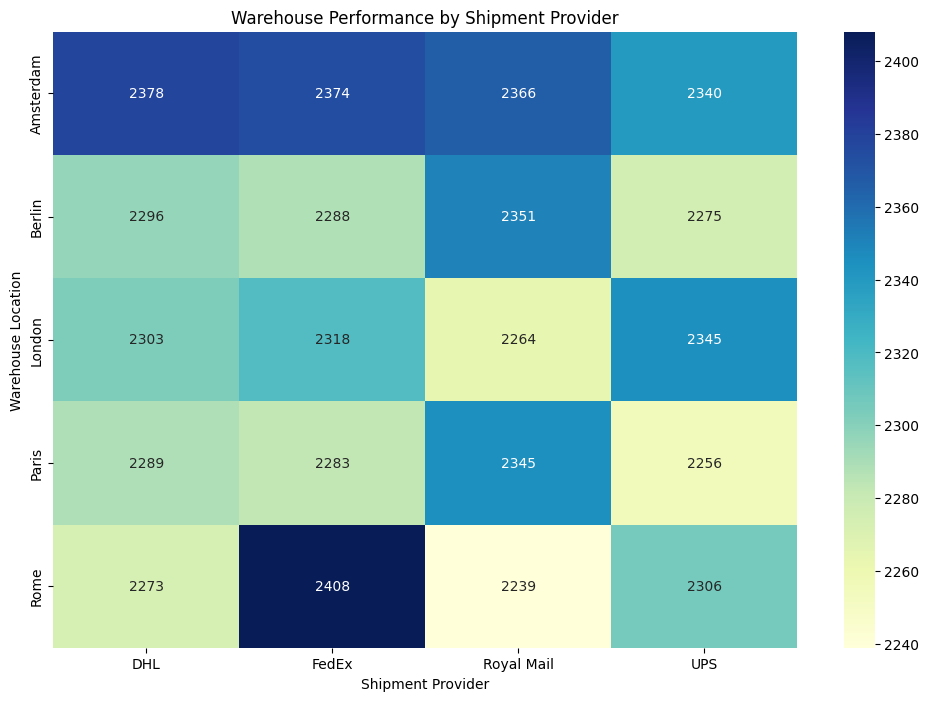

In [98]:
warehouse_performance = df.groupby(['WarehouseLocation', 'ShipmentProvider']).size().reset_index(name='Count')

warehouse_performance_pivot = warehouse_performance.pivot_table(index='WarehouseLocation',
                                                                columns='ShipmentProvider',
                                                                values='Count',
                                                                aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(warehouse_performance_pivot, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Warehouse Performance by Shipment Provider')
plt.xlabel('Shipment Provider')
plt.ylabel('Warehouse Location')
plt.show()

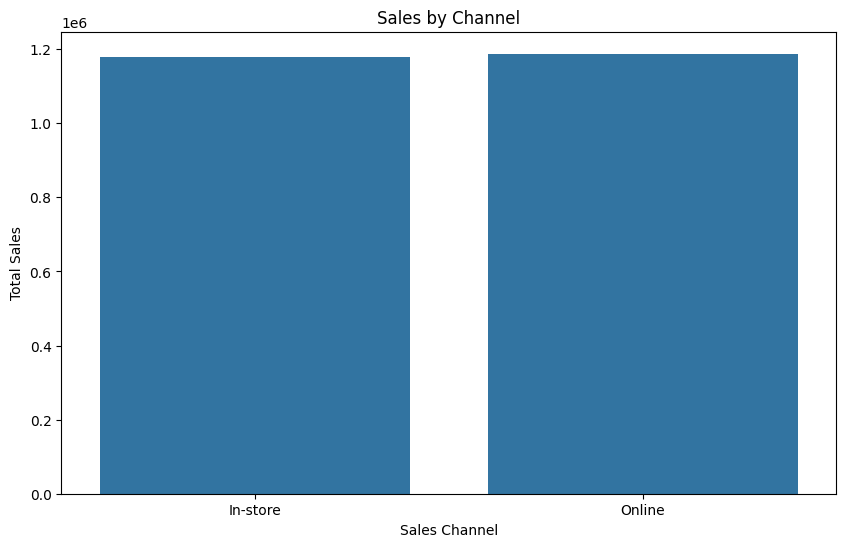

In [99]:
sales_by_channel = df.groupby('SalesChannel').sum(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='SalesChannel', y='UnitPrice', data=sales_by_channel)
plt.title('Sales by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.show()

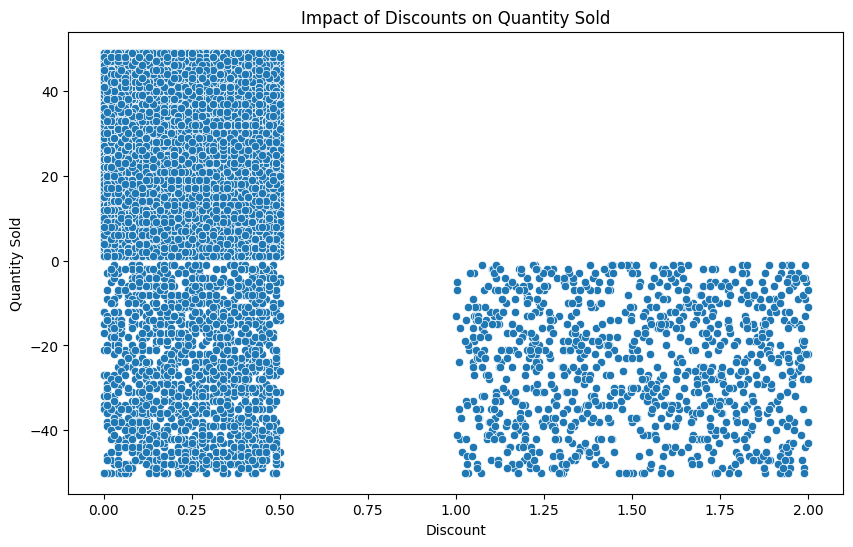

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Quantity', data=df)
plt.title('Impact of Discounts on Quantity Sold')
plt.xlabel('Discount')
plt.ylabel('Quantity Sold')
plt.show()


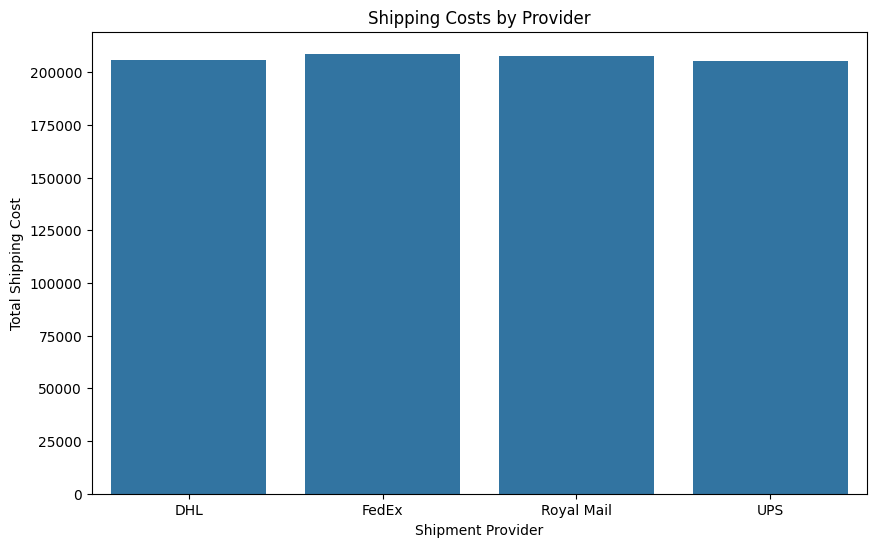

In [101]:
shipping_costs = df.groupby('ShipmentProvider').sum(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ShipmentProvider', y='ShippingCost', data=shipping_costs)
plt.title('Shipping Costs by Provider')
plt.xlabel('Shipment Provider')
plt.ylabel('Total Shipping Cost')
plt.show()

In [109]:
le = LabelEncoder()

In [110]:
numeric_columns = df.select_dtypes(include=['number']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [111]:
df[object_columns] = df[object_columns].apply(le.fit_transform)

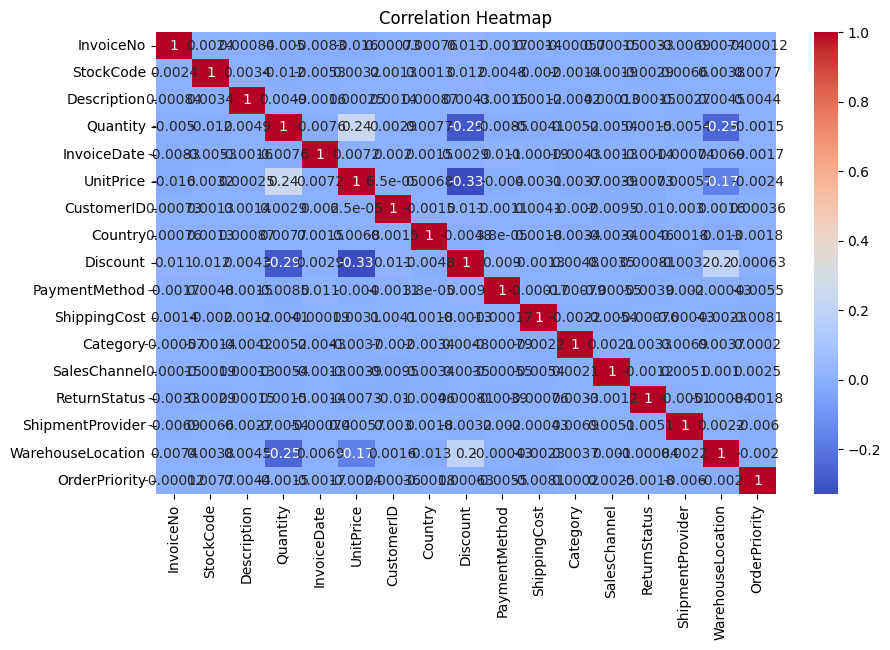

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

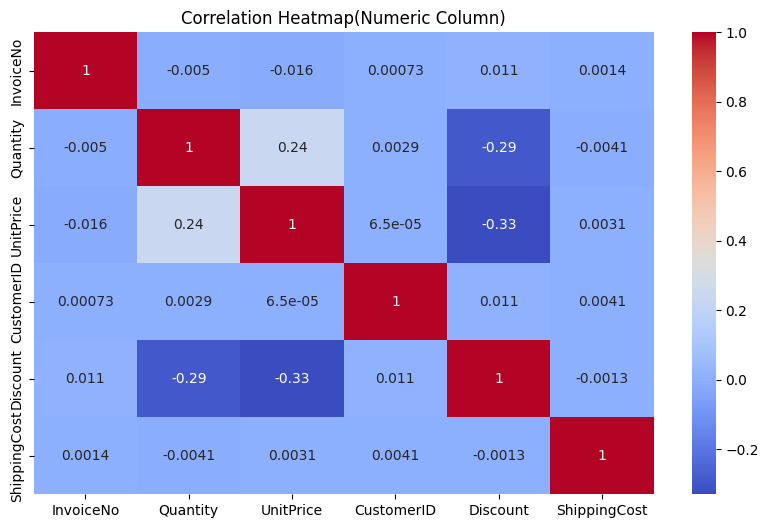

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap(Numeric Column)')
plt.show()

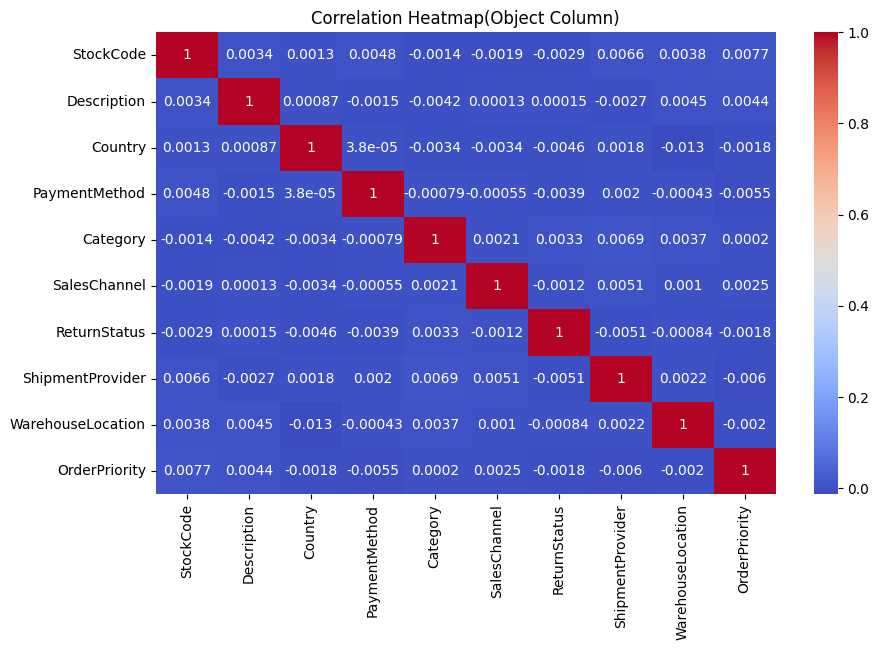

In [117]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[object_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap(Object Column)')
plt.show()